# Modèle 2 : L'effet de serre

## Présentation 

## Le modèle

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from bokeh.plotting import figure
from bokeh.io import output_file, output_notebook, show
from bokeh.layouts import layout, column, row
from bokeh.models import ColumnDataSource, Label, LabelSet
from bokeh.models import Legend, LegendItem
from bokeh.transform import linear_cmap


In [2]:
def greenhouse(alpha=0.3,L=1364):

    eps = 1
    Is = (1 - alpha) * L / 4
    sigma = 5.67 * 10 **(-8)
    timeStep = 1
    Cp = 4000 * 4.2 * 10**6

    Teq1 = (Is / (eps * sigma))**(0.25)
    Teq2 = ( Is / (1 - eps / 2) / sigma)**(1/4)

    time = []
    Ts1 = []
    Ts2 = []

    time.append(0)
    Ts1.append(0)
    Ts2.append(0)

    heatIn = Is

    heatOut1 = 0
    heatOut2 = 0

    heatContent1 = []
    heatContent2 = []

    heatContent1.append(heatIn - heatOut1)
    heatContent2.append(heatIn - heatOut2)

    for it in range(1,2000):
        time.append(time[it-1] + timeStep)

        heatOut1 = eps * sigma * Ts1[it - 1] **4
        heatContent1.append(heatContent1[it - 1] + (heatIn - heatOut1) * timeStep * 3.14 * 10**7)
        Ts1.append(heatContent1[it] / Cp)

        heatOut2 = eps * sigma * Ts2[it - 1]** 4 / 2
        heatContent2.append(heatContent2[it - 1] + (heatIn - heatOut2) * timeStep * 3.14 * 10**7)
        Ts2.append(heatContent2[it] / Cp)

    return Teq1, Teq2, Ts1, Ts2, time

## Version Bokeh

In [3]:
Teq1, Teq2, Ts1, Ts2, time = greenhouse(0.3,3500)


for i in range(2000):
    Ts1[i] = Ts1[i] - 273.15
    Ts2[i] = Ts2[i] - 273.15
    

output_file("effet_de_serre.html")

p1 = figure(plot_width=800, plot_height=400 )

r1=p1.line(time, Ts1, line_color="khaki" , line_width=2)
r2=p1.line(time, Ts2, line_color="darkorange", line_width=2)

legend = Legend(items=[
    LegendItem(label="Avec Effet de Serre", renderers=[r2], index=0),
    LegendItem(label="Sans Effet de Serre", renderers=[r1], index=1),
])
p1.add_layout(legend)

p1.xaxis.visible = True
p1.xaxis.axis_label = 'Temps [unité arbitraire]'
p1.yaxis.visible = True
p1.yaxis.axis_label = 'Température [°C]'
p1.xgrid.grid_line_color = None
p1.ygrid.grid_line_color = None

p1.toolbar.autohide = False

p1.outline_line_width = 1
p1.outline_line_color = "black"

p1.background_fill_alpha = 1
p1.background_fill_color = "white"


show(p1, notebook_handle=True)

## Version Jupiter

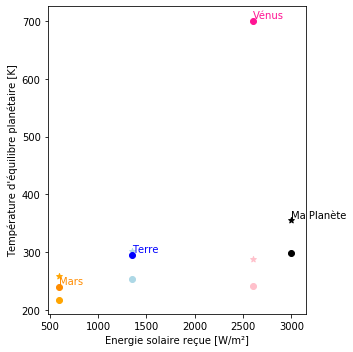

In [4]:
# Ma planète
alpha_random = 0.4
L_random = 3000
Teq1_Random, Teq2_Random, Ts1_Random, Ts2_Random, time4 = greenhouse(alpha_random,L_random)
# Les autres planètes
Teq1_Earth, Teq2_Earth, Ts1_Earth, Ts2_Earth, time = greenhouse(0.3,1350)
Teq1_Venus, Teq2_Venus, Ts1_Venus, Ts2_Venus, time2 = greenhouse(0.7,2600)
Teq1_Mars, Teq2_Mars, Ts1_Mars, Ts2_Mars, time3 = greenhouse(0.15,600)
# Figure 1 : 
plt.figure(figsize=(5,5))
plt.scatter(600,Teq1_Mars,color='orange')
plt.scatter(600,Teq2_Mars,marker='*',color='orange')
plt.scatter(600,240,color='darkorange')
plt.text(600,245,'Mars',color='darkorange')

plt.scatter(1350,Teq1_Earth,color='lightblue',label='Terre')
plt.scatter(1350,Teq2_Earth,marker='*',color='lightblue')
plt.scatter(1350,295,color='blue')
plt.text(1350,300,'Terre',color='blue')

plt.scatter(2600,Teq1_Venus,color='pink',label='Vénus')
plt.scatter(2600,Teq2_Venus,marker='*',color='pink')
plt.scatter(2600,700,color='deeppink')
plt.text(2600,705,'Vénus',color='deeppink')

plt.scatter(L_random,Teq1_Random,color='black',label='Ma Planète')
plt.scatter(L_random,Teq2_Random,marker='*',color='black')
plt.text(L_random,Teq2_Random+4,'Ma Planète',color='black')

plt.xlabel('Energie solaire reçue [W/m²]')
plt.ylabel('Température d' "'" 'équilibre planétaire [K]')
#plt.legend(loc='best')
plt.tight_layout()
plt.show()